In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.integrate import trapz
from scipy.special import gamma
%matplotlib inline
#%precision 4

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

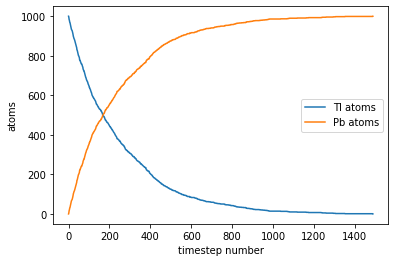

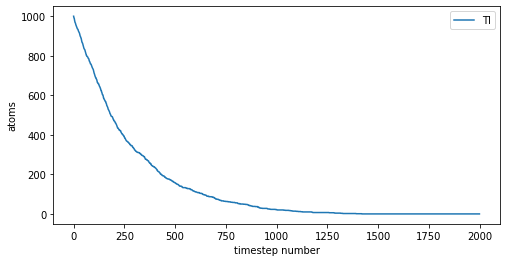

In [2]:
Tlatoms = 1000
Pbatoms = 0
Tlintime = [Tlatoms]
Pbintime = [Pbatoms]
Tlintime1 = [Tlatoms]
Pbintime1 = [Pbatoms]
hlife = 3.052*60 #halflife in seconds
prob = 1-2**(-1/hlife)
Tl = Tl_init = Tlatoms
Pb = 0
j = 0
while Tlatoms > 0:
    
    for i in range(Tlatoms):
        if np.random.rand() < prob:
            Tlatoms -= 1
            Pbatoms += 1
    Tlintime.append(Tlatoms)
    Pbintime.append(Pbatoms)

    
    
time = np.arange(0, len(Tlintime))
fig, ax = plt.subplots()
ax.plot(time, Tlintime, label = 'Tl atoms')
ax.plot(time, Pbintime, label = 'Pb atoms')
ax.set_xlabel('timestep number')
ax.set_ylabel('atoms')
ax.legend(loc = 'best')
plt.show()




def icdf(x, tau):
    return -tau * np.log2(1-x)

  
x = np.random.random(1000)
y = icdf(x, hlife)

fig, ax = plt.subplots(figsize=(8,4))
t = np.arange(0,2000)
Y=[y[y>i].shape[0] for i in t]
ax.plot(t, Y, label = 'Tl')
ax.set_xlabel('timestep number')
ax.set_ylabel('atoms')
ax.legend(loc = 'best')
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

Fraction of particles bounced back 0.1507 % 


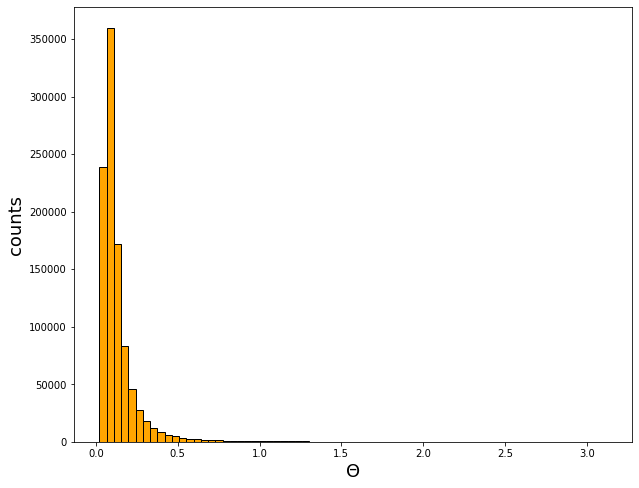

In [3]:
Z = 79 
particles = 10**(6) 
e_charge = 1.602176565*10**(-19) 
E = 7.7*10**(6)
a0 = 5.2917721067*10**(-11) 
e0 = 8.8541878176*10**(-12)
sigma = a0/100

x = np.random.normal(loc = 0, scale = sigma, size = particles)
y = np.random.normal(loc = 0, scale = sigma, size = particles)

b = np.sqrt(np.power(x, 2) + np.power(y, 2))

theta = 2 * np.arctan(Z * e_charge /(2* np.pi * e0 * E * b))


frac = theta[theta > np.pi/2].size/theta.size
print('Fraction of particles bounced back %.4f %% ' %(frac*100))

fig, ax = plt.subplots(figsize = (10, 8))
ax.hist(theta, bins = 70, edgecolor = 'black', color = 'orange')
ax.set_xlabel('$\Theta$', fontsize = 18)
ax.set_ylabel('counts', fontsize = 18)
#plt.yscale("log")
plt.show()

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

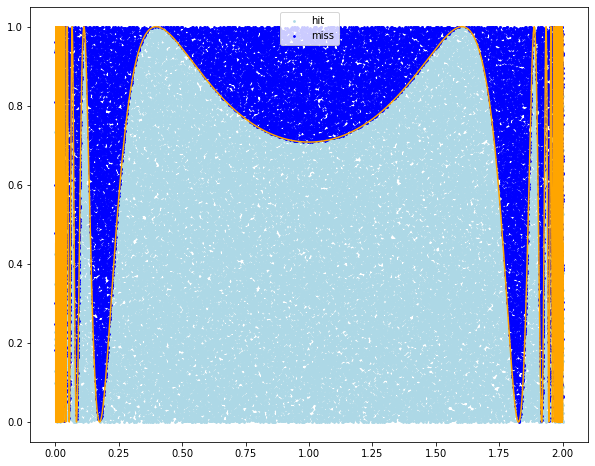

Value calculated with scipy.integrate.trapz:  1.4505331367878012
error hit miss = 0.0010
error mean value = 0.0008


In [4]:
def f(x):
    return np.power(np.sin(1/(x*(2-x))), 2)

N = 100000

xdomain = np.linspace(0.001, 1.999, N)
y = f(xdomain)

Itrapz = trapz(y, xdomain)

fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(xdomain, y, color = 'orange')

x_hit = []
y_hit = []
x_miss = []
y_miss = []

#hit miss method
for i in range(N):
    x = 2 * np.random.random()
    y = np.random.random()
    if y < f(x):
        x_hit.append(x)
        y_hit.append(y)
    else:
        x_miss.append(x)
        y_miss.append(y)


Integral_hm = 2 * float(len(x_hit))/N
ax.scatter(x_hit, y_hit, color = 'lightblue', label = 'hit', s = 3)
ax.scatter(x_miss, y_miss, color = 'blue', label = 'miss', s = 3)
plt.legend(loc = 'best')
plt.show()


#mean value method
x = 2 * np.random.rand(N)
y = f(x)
Integral_mv = 2/N * np.sum(y)

print('Value calculated with scipy.integrate.trapz: ', Itrapz)
err_hm = np.abs(Itrapz - Integral_hm)
print('error hit miss = %.4f' %err_hm)
err_mv = np.abs(Itrapz-Integral_mv)
print('error mean value = %.4f' %err_mv)


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [5]:
def f(x):
    if np.linalg.norm(x) <= 1:
        return 1
    else:
        return 0

N = 100000
    
X = np.random.uniform(-1, 1, (N, 2))
Integral = 4 * sum(f(X[i, :]) for i in range(X.shape[0]))/N
print('area(pi): {}, error wrt np.pi: {} '.format(Integral, abs(np.pi - Integral)))

#generalization to D dimensions
D = 10
X10D = np.random.uniform(-1, 1, (N, D))
IntegralD = np.power(2,D) * sum(f(X10D[i, :]) for i in range(X10D.shape[0]))/N
    

print('area: {}, error wrt attended area calculated with scipy: {} '.format(IntegralD, abs(IntegralD - np.power(np.pi, D/2)/(gamma(D/2 + 1)))))

area(pi): 3.1394, error wrt np.pi: 0.0021926535897929256 
area: 2.52928, error wrt attended area calculated with scipy: 0.020884039877345106 


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

Integral using importance sampling:  0.840077261032743


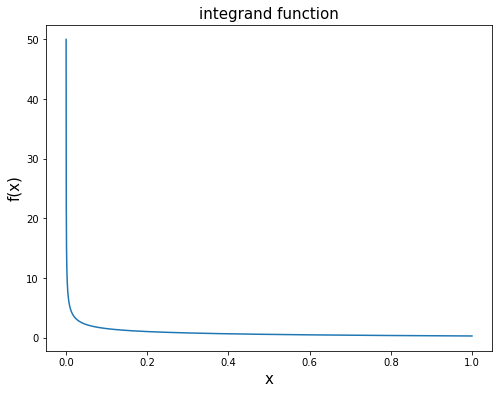

In [6]:
def weight(x):
    return 1/np.sqrt(x)

def f(x):
    return 1/(np.sqrt(x)*(np.exp(x) + 1))

N=10000
y = np.random.uniform(0, 1, N)**2
weight_integrated = 2 #integral of weight function in domain
intg = np. sum(f(y)/weight(y)) * weight_integrated/N
print ('Integral using importance sampling: ', intg)

xdomain = np.delete(np.linspace (0, 1, N), 0)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(xdomain, f(xdomain))
ax.set_ylabel('f(x)', fontsize = 15)
ax.set_xlabel('x', fontsize = 15)
ax.set_title('integrand function', fontsize = 15)
plt.show()
